# GPHY 491-591: Lab 2 
Written by Cascade Tuholske, Jan. 2024  

### <u> Goals <u>
The goal of this lab is to pratice writing code with numpy, pandas, and matplotlib using a real-world dataset. The dataset was developed to understand the relationship between child undernutrition, measured by [USAID Demographic and Health Surveys](https://www.usaid.gov/global-health/demographic-and-health-surveys-program), and national-level indicators of economic development. Child undernutrition is often broken into two categories: low weight for age (stunting - reflecting chronic food insecurity) and low weight for height (wasting - reflecting acute food insecurity). <br>
    
Orthodox theories of economic development posit that as a country urbanizes, its economy grows and food security improves. Thus, more urbanized countries should be more food secure compared to more rural countries. Further, within a country, urban areas should be more food secure compared to rural areas.<br>
    
We will explore this dataset to understand if economic development and food security are well-correlated, and see what proxy indecators of economic development may also correlate with child food insecurity. <br>
    
### <u> Instruction <u>
1. Please rename your notebook as: `Last_First_Lab1` **NOTE:** Naming convetions matter for files, including notebooks and data. Always be consistant. 
2. Complete lab by writing code or answering questions in the cells as in structed by the comments.
3. Copy your notebook to `/home/YOURNETID/gphy591/submissions/`



# Let's import our packages
![import](assets/import.png)

In [1]:
# Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os # this package allows us to interface with out opperating system 

## Let's load the .csv file with pandas and explore it.

In [2]:
# we write file paths and names as their own variables for easy editing
fn = os.path.join('./data/DhsPrevalenceWCovar.csv')
type(fn) # see that our fn is a string, but the os.path.join also helps Python know it's a file path

str

In [3]:
# open the data frame and check it
df = pd.read_csv(fn)
df.head(4) # show first four rows

,country,year,countryCode,continent,stunt_rural,stunt_urban,waste_rural,waste_urban,stunt_all,waste_all,...,foodExport,foodImport,gdpPPP,gdpPPPpercap,giniIndex,urbanPop,urbanPopGrowth,clusterPrecipAnom,nationalTempAnom,nationalPrecipAnom
0,Albania,2008,ALB,Europe,0.240576,0.244390,0.092801,0.124743,0.242117,0.105710,...,4.333982,16.432549,2.921436e+10,9912.196804,30.0,49.991,1.435124,86.245678,102.151715,102.020721
1,Albania,2009,ALB,Europe,0.240576,0.244390,0.092801,0.124743,0.242117,0.105710,...,5.669017,17.087390,3.019429e+10,10313.952000,NaN,51.076,1.473288,132.170168,100.470106,134.103392
2,Armenia,2000,ARM,Asia,0.238902,0.178222,0.019989,0.034612,0.207806,0.027483,...,13.493826,24.967986,1.242650e+10,3921.857522,NaN,64.666,-1.610375,NaN,102.973351,74.551193
3,Armenia,2005,ARM,Asia,0.190440,0.214489,0.033354,0.081562,0.204712,0.061964,...,13.361364,17.662960,2.212058e+10,7259.203892,36.0,63.938,-0.761535,NaN,100.503031,114.152255


In [4]:
# write a for loop that prints all the column names sorted by first letter
for column in sorted(df.columns):
    print(column)

agLabor
agLand
clusterPrecipAnom
continent
country
countryCode
electricity
foodExport
foodImport
gdpPPP
gdpPPPpercap
giniIndex
nationalPrecipAnom
nationalTempAnom
stunt_all
stunt_rural
stunt_urban
urbanPop
urbanPopGrowth
waste_all
waste_rural
waste_urban
year


In [5]:
# What is the shape of the data frame?
df.shape

(313, 23)

In [6]:
# Print the data type for each column.
df.dtypes

country                object
year                    int64
countryCode            object
continent              object
stunt_rural           float64
stunt_urban           float64
waste_rural           float64
waste_urban           float64
stunt_all             float64
waste_all             float64
electricity           float64
agLand                float64
agLabor               float64
foodExport            float64
foodImport            float64
gdpPPP                float64
gdpPPPpercap          float64
giniIndex             float64
urbanPop              float64
urbanPopGrowth        float64
clusterPrecipAnom     float64
nationalTempAnom      float64
nationalPrecipAnom    float64
dtype: object

In [7]:
# Which rows are missing data?
df[df.isna().any(axis=1)]

,country,year,countryCode,continent,stunt_rural,stunt_urban,waste_rural,waste_urban,stunt_all,waste_all,...,foodExport,foodImport,gdpPPP,gdpPPPpercap,giniIndex,urbanPop,urbanPopGrowth,clusterPrecipAnom,nationalTempAnom,nationalPrecipAnom
1,Albania,2009,ALB,Europe,0.240576,0.244390,0.092801,0.124743,0.242117,0.105710,...,5.669017,17.087390,3.019429e+10,10313.952000,NaN,51.076,1.473288,132.170168,100.470106,134.103392
2,Armenia,2000,ARM,Asia,0.238902,0.178222,0.019989,0.034612,0.207806,0.027483,...,13.493826,24.967986,1.242650e+10,3921.857522,NaN,64.666,-1.610375,NaN,102.973351,74.551193
3,Armenia,2005,ARM,Asia,0.190440,0.214489,0.033354,0.081562,0.204712,0.061964,...,13.361364,17.662960,2.212058e+10,7259.203892,36.0,63.938,-0.761535,NaN,100.503031,114.152255
7,Azerbaijan,2006,AZE,Asia,0.318471,0.247271,0.089711,0.054787,0.283225,0.072423,...,5.029066,10.455987,8.021244e+10,9453.941860,NaN,52.589,1.479626,NaN,100.954018,107.718260
8,Bangladesh,1996,BGD,Asia,0.607951,0.454662,0.223023,0.143877,0.588840,0.213156,...,10.091940,17.030774,2.420000e+11,2017.213522,NaN,22.064,3.449108,NaN,100.558131,94.189645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,Zimbabwe,1999,ZWE,Africa,0.376747,0.304661,0.116533,0.051767,0.354911,0.096914,...,50.694944,8.792567,3.357974e+10,2866.032886,NaN,33.347,2.676077,108.391269,98.543494,106.125417
308,Zimbabwe,2005,ZWE,Africa,0.378807,0.295647,0.082944,0.068671,0.357817,0.079341,...,23.853604,12.795442,2.217783e+10,1814.174381,NaN,34.110,-0.014148,90.035823,104.464741,92.305416
309,Zimbabwe,2006,ZWE,Africa,0.378807,0.295647,0.082944,0.068671,0.357817,0.079341,...,13.975345,20.891491,2.141015e+10,1736.358333,NaN,33.926,0.320336,100.107170,99.441802,113.888701
310,Zimbabwe,2010,ZWE,Africa,0.330405,0.281124,0.039438,0.032604,0.317756,0.037684,...,22.438027,17.911695,2.310568e+10,1799.540233,NaN,33.196,0.706879,102.202053,101.863930,109.131923


Our dataset is organized in survey-year-country rows. This means that each year is a single survey for a single country. All the metrics are national-level, meaning that stunting or wasting are rates (e.g. prevelance). 

In [8]:
# Which country-year had the highest stunting prevalence for all households?
df.loc[df['stunt_all'].idxmax()]

country                  Madagascar
year                           1992
countryCode                     MDG
continent                    Africa
stunt_rural                0.661545
stunt_urban                0.540161
waste_rural                0.056063
waste_urban                0.038153
stunt_all                  0.643071
waste_all                  0.053337
electricity                     9.2
agLand                     62.54084
agLabor                    76.52773
foodExport                68.219322
foodImport                13.392456
gdpPPP                20375253257.0
gdpPPPpercap             1614.09342
giniIndex                       NaN
urbanPop                     24.681
urbanPopGrowth              5.34426
clusterPrecipAnom               NaN
nationalTempAnom          98.684006
nationalPrecipAnom        97.005517
Name: 164, dtype: object

In [9]:
# Which country-year had the lowest stunting prevalence for all households?
df.loc[df['stunt_all'].idxmin()]

country                      Rwanda
year                           2019
countryCode                     RWA
continent                    Africa
stunt_rural                     0.0
stunt_urban                     NaN
waste_rural                     0.0
waste_urban                     NaN
stunt_all                       0.0
waste_all                       0.0
electricity                    46.6
agLand                     77.17876
agLabor                    52.67843
foodExport                34.794969
foodImport                16.936332
gdpPPP                28115923656.0
gdpPPPpercap            2190.561926
giniIndex                       NaN
urbanPop                     17.313
urbanPopGrowth             2.981693
clusterPrecipAnom          98.84698
nationalTempAnom         103.192937
nationalPrecipAnom        65.606657
Name: 248, dtype: object

In [10]:
# How many surveys were conducted in Senegal?
geog = 'Senegal'
df_ = df[df['country'] == geog]
len(df_)

13

In [11]:
# What years were surveys conducted in Senegal?
df_['year']

252    1992
253    1993
254    2005
255    2010
256    2011
257    2012
258    2013
259    2014
260    2015
261    2016
262    2017
263    2018
264    2019
Name: year, dtype: int64

In [12]:
# Using for loops, print the year of the year and prevalence ranked highest to lowest for urban wasting for senegal.

df_sorted = df_.sort_values("waste_urban", ascending = False)
for yr, waste in enumerate(zip(df_sorted.year, df_sorted.waste_urban)):
    print(yr, waste)

0 (2010, 0.115012629)
1 (2011, 0.115012629)
2 (2012, 0.082925321)
3 (2013, 0.082925321)
4 (2017, 0.081294164)
5 (2015, 0.079801349)
6 (2018, 0.07173421)
7 (2019, 0.070286355)
8 (2016, 0.065653124)
9 (1992, 0.06542811)
10 (1993, 0.06542811)
11 (2014, 0.057028088)
12 (2005, 0.054209046)


In [13]:
# Another way to do this, is using the built-in methods to a pandas data frame 'sort_values'
df_.sort_values('waste_urban', ascending = True)

,country,year,countryCode,continent,stunt_rural,stunt_urban,waste_rural,waste_urban,stunt_all,waste_all,...,foodExport,foodImport,gdpPPP,gdpPPPpercap,giniIndex,urbanPop,urbanPopGrowth,clusterPrecipAnom,nationalTempAnom,nationalPrecipAnom
254,Senegal,2005,SEN,Africa,0.261728,0.132712,0.093712,0.054209,0.215923,0.079687,...,28.822376,28.139253,3.059048e+10,2787.526892,39.2,41.714,3.524171,125.195587,101.439134,126.935953
259,Senegal,2014,SEN,Africa,0.238132,0.138905,0.078681,0.057028,0.196129,0.069515,...,34.770632,22.781849,4.065763e+10,2910.288864,NaN,45.436,3.641058,80.864364,100.774577,92.088913
252,Senegal,1992,SEN,Africa,0.375175,0.221325,0.107293,0.065428,0.303679,0.087838,...,NaN,NaN,1.935822e+10,2427.510861,NaN,39.180,3.163572,77.040678,98.916989,86.186147
253,Senegal,1993,SEN,Africa,0.375175,0.221325,0.107293,0.065428,0.303679,0.087838,...,NaN,NaN,1.962153e+10,2393.876688,NaN,39.321,3.105499,89.573768,99.348917,91.113471
261,Senegal,2016,SEN,Africa,0.204598,0.117589,0.096573,0.065653,0.172423,0.085139,...,32.219563,23.351211,4.599509e+10,3118.024321,NaN,46.296,3.657310,102.335350,101.327314,107.057383
264,Senegal,2019,SEN,Africa,0.216055,0.118986,0.096465,0.070286,0.180561,0.086893,...,32.918857,19.609161,5.489042e+10,3430.483882,NaN,47.653,3.669750,89.929804,101.443553,80.234835
263,Senegal,2018,SEN,Africa,0.230304,0.126899,0.094745,0.071734,0.191035,0.086006,...,32.292665,21.043717,5.246967e+10,3368.858596,38.3,47.192,3.677055,90.003551,100.221001,99.761651
260,Senegal,2015,SEN,Africa,0.248579,0.149995,0.099807,0.079801,0.212271,0.092439,...,31.359992,21.688935,4.324632e+10,3012.383374,NaN,45.862,3.657857,122.997624,100.606463,103.153827
262,Senegal,2017,SEN,Africa,0.210724,0.107988,0.107297,0.081294,0.172995,0.097748,...,34.231624,23.989994,4.940217e+10,3259.192580,NaN,46.740,3.672445,98.506265,101.286283,105.490621
257,Senegal,2012,SEN,Africa,0.220837,0.167896,0.115063,0.082925,0.204458,0.105121,...,26.848014,24.145794,3.737375e+10,2824.532853,NaN,44.603,3.661748,131.155050,99.905978,120.996972


In [14]:
# You can look at all the available functions using the key word 'dir'
dir(df_)

['T',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__dataframe__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__reduce__',
 '__reduce_ex_

In [15]:
# You can use 'help' to understand objects, methods, functions, etc.
# Parameters (also called 'arguments') are the objects you pass to a function before you 'call it'
help(df_.sort_values)

Help on method sort_values in module pandas.core.frame:

sort_values(by: 'IndexLabel', *, axis: 'Axis' = 0, ascending: 'bool | list[bool] | tuple[bool, ...]' = True, inplace: 'bool' = False, kind: 'str' = 'quicksort', na_position: 'str' = 'last', ignore_index: 'bool' = False, key: 'ValueKeyFunc' = None) -> 'DataFrame | None' method of pandas.core.frame.DataFrame instance
    Sort by the values along either axis.
    
    Parameters
    ----------
            by : str or list of str
                Name or list of names to sort by.
    
                - if `axis` is 0 or `'index'` then `by` may contain index
                  levels and/or column labels.
                - if `axis` is 1 or `'columns'` then `by` may contain column
                  levels and/or index labels.
    axis : {0 or 'index', 1 or 'columns'}, default 0
         Axis to be sorted.
    ascending : bool or list of bool, default True
         Sort ascending vs. descending. Specify list for multiple sort
         or

In [16]:
# You can also summerize each column easily
df_.describe()

,year,stunt_rural,stunt_urban,waste_rural,waste_urban,stunt_all,waste_all,electricity,agLand,agLabor,foodExport,foodImport,gdpPPP,gdpPPPpercap,giniIndex,urbanPop,urbanPopGrowth,clusterPrecipAnom,nationalTempAnom,nationalPrecipAnom
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,12.000000,13.000000,13.000000,11.000000,11.000000,1.300000e+01,13.000000,3.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,2010.384615,0.265524,0.170749,0.101115,0.077441,0.228573,0.091966,56.975000,47.231001,35.722666,31.344768,23.121167,3.871370e+10,2920.693161,39.266667,44.382846,3.569021,103.610499,100.732426,103.951913
std,8.761074,0.062270,0.058279,0.009774,0.019087,0.054890,0.011462,11.389399,1.235435,9.211719,2.823314,2.182189,1.106010e+10,317.106198,1.001665,2.765506,0.197083,21.152221,0.921880,15.986811
min,1992.000000,0.204598,0.107988,0.078681,0.054209,0.172423,0.069515,26.000000,45.582507,22.245040,26.756547,19.609161,1.935822e+10,2393.876688,38.300000,39.180000,3.105499,77.040678,98.916989,80.234835
25%,2010.000000,0.220837,0.126899,0.096465,0.065428,0.191035,0.086006,56.500000,46.564172,31.261260,29.681621,22.048814,3.546216e+10,2790.897410,38.750000,43.773000,3.640180,89.929804,100.221001,92.088913
50%,2013.000000,0.238132,0.149995,0.101248,0.071734,0.204458,0.087838,58.750000,46.600530,34.864730,32.219563,22.945852,3.827535e+10,2830.153244,39.200000,45.019000,3.657857,98.506265,100.774577,103.153827
75%,2016.000000,0.324836,0.221325,0.107293,0.082925,0.303679,0.105121,62.400000,48.423622,38.188450,33.475083,24.067894,4.599509e+10,3118.024321,39.750000,46.296000,3.665644,122.997624,101.439134,110.125771
max,2019.000000,0.375175,0.274109,0.115063,0.115013,0.306920,0.106110,70.400000,48.797590,52.201060,34.770632,28.139253,5.489042e+10,3430.483882,40.300000,47.653000,3.677055,145.656817,102.095910,133.983894


## New Columns
You can easily make new columns in a Pandas DateFrame using simple math.

In [17]:
# Make a new column that is the ratio of agLabor to agLand
df_['agLabor-to-agLand'] = df_['agLabor'] / df_['agLand']

/var/folders/1q/4fd5w5_d5m3_l087yl0p7kt46wjsmq/T/ipykernel_48895/92771218.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['agLabor-to-agLand'] = df_['agLabor'] / df_['agLand']


The warning is important. **Always** read about warnings before deciding if you are okay with moving forward. In this case, we are okay to continue.

In [18]:
# what kind of data is df_['agLabor-to-agLand']?
df_['agLabor-to-agLand'].dtypes

dtype('float64')

In [19]:
# Let's round our data two 2 decimals
df_['agLabor-to-agLand'] = df_['agLabor-to-agLand'].round(2)

/var/folders/1q/4fd5w5_d5m3_l087yl0p7kt46wjsmq/T/ipykernel_48895/578438654.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['agLabor-to-agLand'] = df_['agLabor-to-agLand'].round(2)


In [20]:
# what kind of data is df_['agLabor-to-agLand'] now?
df_['agLabor-to-agLand']

252    1.14
253    1.14
254    0.91
255    0.79
256    0.80
257    0.78
258    0.75
259    0.71
260    0.65
261    0.71
262    0.58
263    0.46
264    0.47
Name: agLabor-to-agLand, dtype: float64

In [21]:
# Let's change it to save memory
df_['agLabor-to-agLand'] = df_['agLabor-to-agLand'].astype('float32')

/var/folders/1q/4fd5w5_d5m3_l087yl0p7kt46wjsmq/T/ipykernel_48895/1295747487.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['agLabor-to-agLand'] = df_['agLabor-to-agLand'].astype('float32')


### Let's do the same, but for agLabor to foodExport

In [45]:
# Make a new column that is the ratio of agLabor to agLand
df_c = df_.copy()
df_c.loc[:, 'agLabor-to-foodExport'] = df_c['agLabor'] / df_c['foodExport']

Notice `.copy()` removes the warning. You are now doing proper indexing under the latest version of Pandas by creating a new copy of the Senegal data.

## Now explore a bit yourself

Which country and what year did the highest [gdp ppp](https://www.cia.gov/the-world-factbook/field/real-gdp-purchasing-power-parity/country-comparison#:~:text=A%20nation%27s%20GDP%20at%20purchasing,prevailing%20in%20the%20United%20States.) happen? 

In [50]:
# Code here. (note: you should us the df object, not df_)
df.sort_values('gdpPPP', ascending = False)[['country','year']]

,country,year
138,India,2016
137,India,2016
136,India,2015
135,India,2015
134,India,2000
...,...,...
65,Comoros,2012
64,Comoros,1996
251,Sao Tomeand Principe,2009
250,Sao Tomeand Principe,2008


Across all years, what is the correlation between gdp ppp and stunting? <br> Hint - you can try `np.corrcoef(x, y)`

In [52]:
# Code here.
np.corrcoef(df['gdpPPP'], df['stunt_all'])

array([[nan, nan],
       [nan,  1.]])

In [54]:
df[['gdpPPP', 'stunt_all']].corr()

,gdpPPP,stunt_all
gdpPPP,1.00000,0.01091
stunt_all,0.01091,1.00000


Across all years, what is the correlation between gdp ppp and stunting for surveys conducted after 2000? <br> Hint - you can subset your DataFrame by year with `df[df['year'] > 2000]`

In [60]:
# Code here.
df[df['year'] > 2000][['gdpPPP', 'stunt_all']].corr()

,gdpPPP,stunt_all
gdpPPP,1.000000,0.010408
stunt_all,0.010408,1.000000


# Let's do some plots

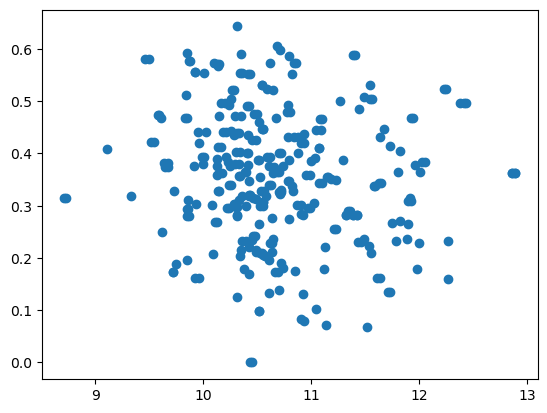

In [63]:
# Make a scatter plot of the relationship between GPD PPP and All Stunting
x = df['gdpPPP']
y = df['stunt_all']
plt.scatter(np.log10(x), y,)

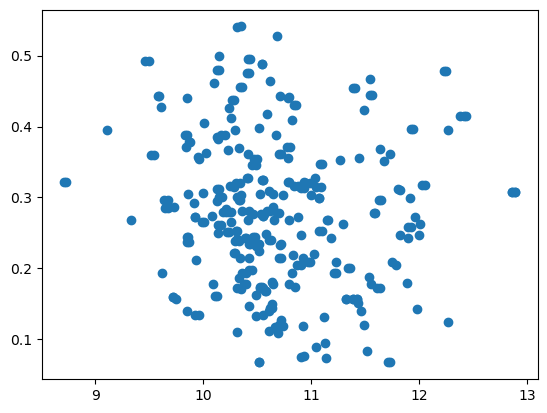

In [64]:
# Make a scatter plot of the relationship between GPD PPP and Urban Stunting
x = df['gdpPPP']
y = df['stunt_urban']
plt.scatter(np.log10(x), y,)

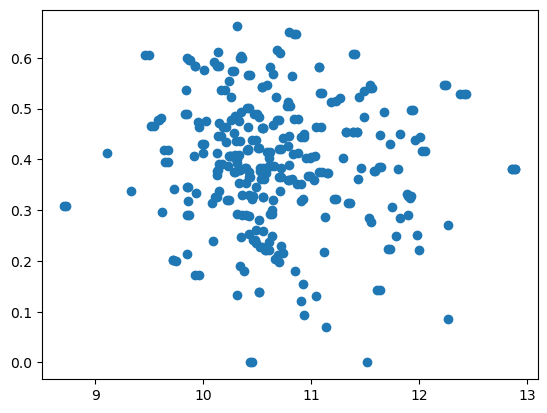

In [65]:
# Make a scatter plot of the relationship between GPD PPP and Rural Stunting
x = df['gdpPPP']
y = df['stunt_rural']
plt.scatter(np.log10(x), y,)

Text(0, 0.5, 'Stunting Rate (%)')

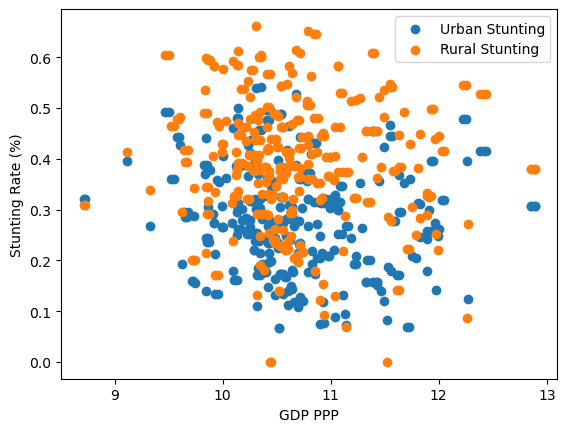

In [67]:
# Make a scatter plot of the relationship between GPD PPP with both Urban and Rural Stunting plotted 
# on the same plot
x = df['gdpPPP']
y = df['stunt_urban']
plt.scatter(np.log10(x), y,)

x = df['gdpPPP']
y = df['stunt_rural']
plt.scatter(np.log10(x), y,)

plt.legend(labels = ['Urban Stunting', 'Rural Stunting'])
plt.xlabel('GDP PPP')
plt.ylabel('Stunting Rate (%)')


FYI: UrbanPop is the percentage of the total population classified as 'urban'. 

[Text(0.5, 0, 'Urban Population %')]

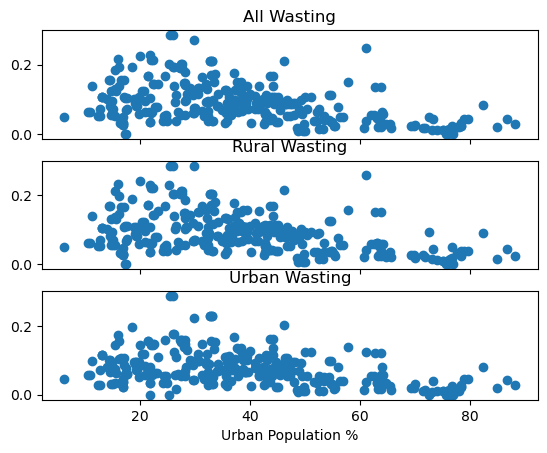

In [69]:
# Make a three panel figure with panel (A) the relationship between UrbanPop and All wasting 
# panel (B) the relationship between UrbanPop and rural wasting, and panel (C) the relationship 
# between UrbanPop and urban wasting.

x = df['urbanPop']

fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)
ax1.scatter(x, df['waste_all'])
ax1.set_title('All Wasting')
ax2.scatter(x, df['waste_rural'])
ax2.set_title('Rural Wasting')
ax3.scatter(x, df['waste_urban'])
ax3.set_title('Urban Wasting')
ax3.set(xlabel='Urban Population %')

### Take some time to read about the package [Seaborn](https://seaborn.pydata.org)

In [71]:
import seaborn as sns

<AxesSubplot: xlabel='gdpPPP', ylabel='Count'>

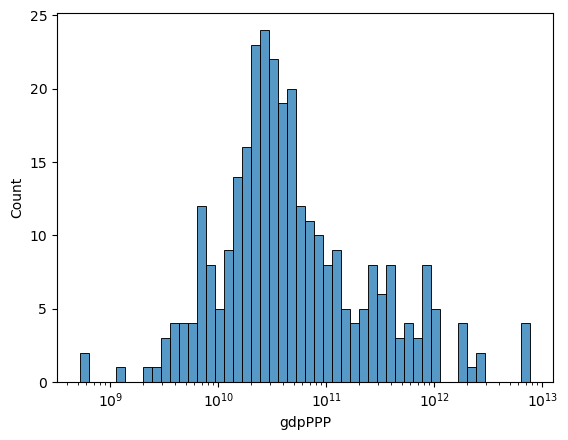

In [72]:
# Try making a histogram of GPD PPP using Seaborn
sns.histplot(data = df, x = 'gdpPPP', bins = 50, log_scale=True)

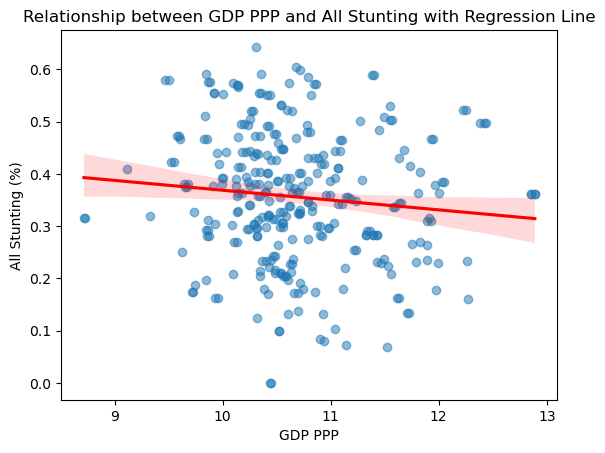

In [77]:
# Try making a scatter plot of the relationship between GPD PPP and All Stunting 
# with the regression line using seaborn using Seaborn
# Create a scatter plot with a regression line
data = df[['gdpPPP', 'stunt_all']].copy()
data['log10_gdpPPP'] = np.log10(data['gdpPPP'])

sns.regplot(data= data, x='log10_gdpPPP', y='stunt_all', scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

# Adding labels and title for clarity
plt.xlabel('GDP PPP')
plt.ylabel('All Stunting (%)')
plt.title('Relationship between GDP PPP and All Stunting with Regression Line')

plt.show()

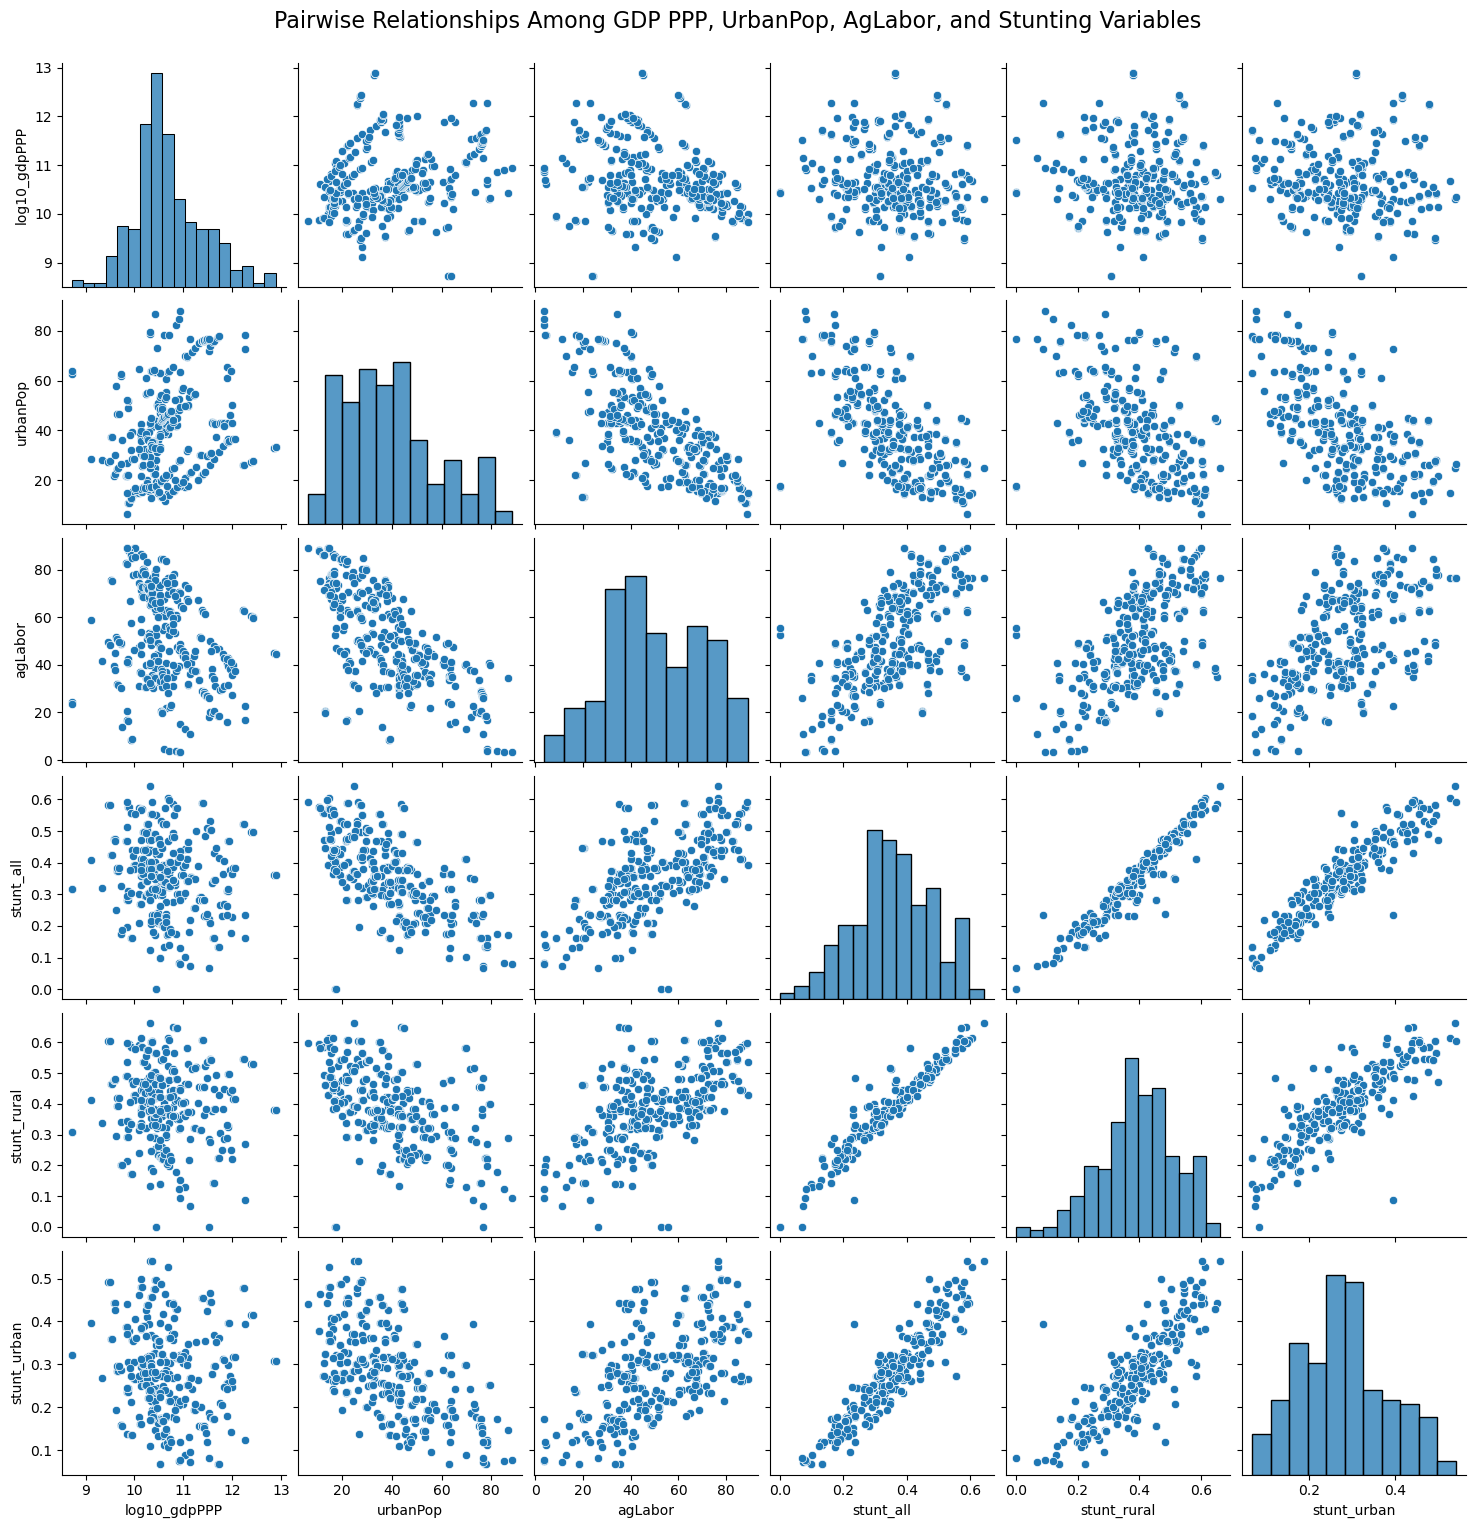

In [81]:
# Try making a pairplot of GPD PPP, UrbanPop, AgLabor, All Stunting, Rural Stunting, and Urban Stunting
# Create the pairplot
data = df[['gdpPPP','urbanPop', 'agLabor', 'stunt_all', 'stunt_rural', 'stunt_urban']].copy()
data['log10_gdpPPP'] = np.log10(data['gdpPPP'])

sns.pairplot(data, vars=['log10_gdpPPP','urbanPop', 'agLabor', 'stunt_all', 'stunt_rural', 'stunt_urban'])

# Adding a title (Note: This method of adding title might not be directly supported by sns.pairplot, see alternative below)
plt.suptitle('Pairwise Relationships Among GDP PPP, UrbanPop, AgLabor, and Stunting Variables', size=16, y=1.02)

plt.show()

# Questions

### Question 1: Which variables are most highly correlated: GPD PPP, UrbanPop, AgLabor, All Stunting, Rural Stunting, and Urban Stunting? Provide evidence to support your conclusions.

Answer 1: <br>
xyz ...